# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday February 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 62 fair dice with faces `{1,2,3,4,5,6}`. Call these dice "Standard." In the same box, there are also 2 additional fair dice with faces `{1,1,2,2,3,3}`. Call these dice "Weird."  You grab one die at random from the box.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You roll your die one time.  What is the probability that you roll a 1? 

***
**Solution**:

$P(r1) = P(r1 \mid W)P(W) + P(r1 \mid S) P(S)$

$ = \frac{2}{6}\frac{2}{64} + \frac{1}{6}\frac{62}{64}$

$ = \frac{4}{384} + \frac{62}{384}$

$ = \frac{66}{384} = \frac{33}{192} \approx 0.1719$

***

**Part B**: Suppose you roll a 1.  What is the probability that the die you chose from the box is Weird? 

***
**Solution**:

$$P(W \mid r1) = \frac{P(r1\mid W) P(W)}{P(r1)}$$

$$= \frac{\frac{2}{6}\frac{2}{64}}{\frac{33}{192}}$$

$$= \frac{\frac{4}{384}}{\frac{33}{192}}$$

$$= \frac{2}{33}\approx 0.061$$

***

**Part C**: Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 4, 5, or 6 you know you picked a Standard die. But, if you roll $n$ times in a row and get only 1, 2, or 3,  you would have a stronger belief that you in fact grabbed one of the Weird dice. What is the smallest value of $n$ successive rolls of 1, 2, or 3 that would make you believe that there's a better-than-90% chance that the die you grabbed is Weird?  

***
**Solution**:

Let $E_n$ be the event that we roll $n$ values in a row that are 1,2 or 3. 
$$P(W \mid E_n) = \frac{P(E_n \mid W) P(W)}{P(E_n)}$$

LTP on the denominator to get
$$P(W \mid E_n) = \frac{P(E_n \mid W) P(W)}{P(E_n \mid W) P(W) + P(E_n \mid S) P(S)}$$

Sub in the easy things
$$P(W \mid E_n) = \frac{P(E_n \mid W) \frac{2}{64}}{P(E_n \mid W) \frac{2}{64} + P(E_n \mid S) \frac{62}{64}}$$

Side calculation: what's the probability that I get $\leq 3$ $n$ times in a row if I have a weird die in hand?
$$P(E_n \mid W) = 1$$

Side calculation: what's the probability that I get $\leq 3$ $n$ times in a row if I have a standard die in hand?
$$P(E_n \mid W) = \frac{1}{2^n}$$

Plug in side calcs:
$$P(W \mid E_n) = \frac{ 1 \cdot \frac{2}{64}}{1 \cdot \frac{2}{64} + \frac{1}{2^n} \frac{62}{64}}$$

Multiply by 64/64
$$P(W \mid E_n) = \frac{2}{2 + \frac{62}{2^n}}$$

Divide by 2 and impose what we want: $\geq 0.9$
$$P(W \mid E_n) = \frac{1}{1 + \frac{62}{2^{n+1}}} \geq 0.9$$

Algebra...
$$\frac{1}{0.9} \geq 1 + \frac{62}{2^{n+1}}$$

Algebra...
$$\frac{10}{9}-1 \geq \frac{62}{2^{n+1}}$$

Algebra...
$$ 2^{n+1}\geq \frac{62}{\frac{1}{9}}$$

Algebra...
$$ n+1 \geq \log_2 [62\cdot9]$$

In [36]:
# Compute
np.log2(62*9)

9.124121311829187

So if $n+1 \geq 9.12$ then $n \geq 8.12$, so we should have $n=9$ (since $n$ must be an integer).

***

In [87]:
# Just for fun, double check the sequence of probabilities...
for n in range(1,10):
    print(n,"{:.4f}".format(2/(2+(62/(2**n)))))

1 0.0606
2 0.1143
3 0.2051
4 0.3404
5 0.5079
6 0.6737
7 0.8050
8 0.8920
9 0.9429


### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

***
**Solution**: 

$$
\Omega = \{GM, MG, GGGM, GGMG, MMGM, MMMG, \ldots \}
$$
***

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

***
**Solution**: We have 

$$
P(W \mid E) = \frac{P(W \cap E)}{P(E)} = \frac{P(\{GM\})}{P(\{GM, MG\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

***

**Part C**: Explain why events $W$ and $T$ are independent. 

***
**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that team A wins and the probability that the game is still tied after the first round *must* be independent. Each round of the shootout begins with the two teams tied, and takes place identically, regardless of what score the teams are tied at. (5 to 5 is the sames as 10 to 10). So Team A's probability of winning beginning on round 1 vs their probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(W|T) = P(W)$$
which means they are independent.
***

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

***
**Solution**: We'll use the Law of Total Probability and condition on the events that the game ends and that the game remains tied after the first round of sudden death. 

\begin{eqnarray}
\nonumber P(W) &=& P(W \mid E)P(E) + P(W \mid T)P(T)  \\
\\
\nonumber  &=& P(W \mid E)P(\{GM, MG\}) + P(W \mid T)P(\{GG, MM\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} P(\{GM, MG\}) + P(W \mid T)P(\{GG, MM\})  \quad \left[\textrm{From }\textbf{Part A}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(GM)+ P(MG))\right] + P(W \mid T)\left[P(GG) + P(MM)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(W \mid T)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(W \mid T)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(W \mid T)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}


***

**Part E**: Use the fact from **Part B** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

***
**Solution**: We'll use the Law of Total Probability and condition on the events that the game ends and that the game remains tied after the first round of sudden death. 

Part D tells us:
$$P(W) = p(1-q) + P(W \mid T)\left(2pq - p - q +1 \right)$$

And Part B tells us:
$$P(W \mid T) = P(W)$$

Put them together.
$$P(W) = p(1-q) + P(W)\left(2pq - p - q +1 \right)$$

Solve for $P(W)$.
$$P(W) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(W) = \frac{p(1-q)}{-2pq + p + q }$$
***

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

***
**Solution**:
If there is no winner, it is as if the whole shootout process restarts. The shootout has  no memory of previous rounds. Thus, the probability that A wins must be the same as the probability that A wins in just one round. 

Therefore, $P(W) = P(W \mid E)$.
***


**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

***
**Solution**:
We can only use this sort of technique if, indeed $W$ is independent of $T$. In a different problem, where these two events were not independent, this solution approach would not work.
***

### [25 points] Problem 3 
***

Jerry and Steve are just your typical North American river otters. They like typical otter things: sushi, the Boulder Reservoir, Kyle's office, Sofie's office, and the Ecology Department.  

After CSCI 3022 lets out for the day, there are a bunch of different locations that Jerry and Steve individually end up at.  Sometimes they go get sushi on the hill ($~H~$) or go for a swim at the Res ($~R~$). Sometimes they go straight to office hours with Kyle ($~K~$) or with Sofie ($~S~$), or they read otter-related literature in the Ecology dept ($~E~$). You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on map below.

Now, on a Wednesday after a really bumpy few days, Jerry and Steve leave class at Muenzinger, very very grumpy. They just wander randomly between their usual spots. Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along with equal probability. This even includes backtracking as an option! They sure are grumpy. 

![steve_and_jerry.png](steve_and_jerry.png)

**Part A**: Compute (by hand) the probability that Steve ends up at the the Boulder Reservoir after first visiting one other location after leaving Muenzinger. 

***
**Solution**:
Let $R_2$ be the event that Steve goes to the Reservoir $R$ as his second location. Similarly, let $H_1$ and $K_1$ be the events that Steve goes to the hill and Kyle's as his first location, respectively. By LTP, we have

$$P(R_2) = P(R_2 \mid H_1)P(H_1) + P(R_2\mid K)P(K_1)$$

$$P(R_2) = \frac{1}{2}\cdot\frac{1}{3} + \frac{1}{4}\cdot\frac{1}{3}$$

$$P(R_2) = \frac{2}{12} + \frac{1}{12} = \frac{3}{12} = \frac{1}{4}$$
***

**Part B**: Compute (by hand) the probability that Jerry ends up at Kyle's office _either_ as his first _or_ second location visited after leaving the Reservoir. (Again, assume that Jerry wanders randomly using the same rules described above.)

***
**Solution**:
Let $K_1$ be the event that Jerry goes to Kyle's on his first stop after leaving the Res, and let $K_2$ be the event that Jerry goes to Kyle's on his second stop. 

Writing down $P(K_1)$ is straightforward. There are four places to go from $R$, and one is $K$. 
$$P(K_1) = \frac{1}{4}$$

And, we can write down $P(K_2)$ via the law of total probability.
$$P(K_2) = P(K_2 \mid S_1) P(S_1) + P(K_2 \mid E_1) P(E_1) + P(K_2 \mid K_1) P(K_1) + P(K_2 \mid M_1) P(M_1) + P(K_2 \mid H_1) P(H_1)$$ 

However, some of these are going to be zero. For example, $P(E_1)=0$ because we can't get to $E$ from $R$. And $P(K_2 \mid K_1)=0$ because Jerry wanders away, so if he's at $K$ now, he can't be there in the next step. Therefore, we simplify to
$$P(K_2) = P(K_2 \mid S_1) P(S_1) + P(K_2 \mid M_1) P(M_1) + P(K_2 \mid H_1) P(H_1)$$ 

This can be filled in using what we know about the moves around the campus.
$$P(K_2) = \frac{1}{3} \frac{1}{4} + \frac{1}{3} \frac{1}{4} + 0 \frac{1}{4} = \frac{1}{6}$$ 

To put things together, 
$$P(K_1 \cup K_2) = P(K_1) + P(K_2) - P(K_1 \cap K_2)$$

Because otters do wander, 
$$P(K_1 \cap K_2) = 0$$

Therefore, we have $P(K_1 \cup K_2) = \frac{1}{4} + \frac{1}{6} = \frac{5}{12}$.
***

**Part C**: Suppose that Jerry goes to the Boulder Reservoir and Steve goes to the Ecology Dept.  Later that afternoon, they both leave and wander around, randomly, as described above. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on the first location visited? What is the probability that they run into each other in the same location on the second location visited? What is the probability that they run into each other in either the first or second location visited?

***
**Solution**:
The only places they could bump into each other after one movement would be $K$ and $S$.

Let $K_1$ and $S_1$ be the events that Jerry goes to $K$ and $S$, respectively, at timestep 1, and let $k_1$ and $s_1$ be similarly defined probabilities for Steve. Remember, Jerry starts at $R$ and Steve starts at $E$.

$$P(K_1) = \frac{1}{4},\quad P(S_1) = \frac{1}{4}$$
$$P(k_1) = \frac{1}{2},\quad P(s_1) = \frac{1}{2}$$

Since they move independently, the probability that they both end up at $K$ is $P(K_1)P(k_1) = \frac{1}{8}$, and the probability that they both end up at $S$ is $P(S_1)P(s_1) = \frac{1}{8}$. Thus, the probability that they both end up at $S$ or they both end up at $K$ is $\frac{1}{8} + \frac{1}{8} = \frac{1}{4}$. 

What about after two movements? Now we need to compute the probability that we find each otter at each of the various locations after two steps. Jerry can go from the Res to $E$, $K$, $M$, $H$, $R$, and $S$! Meanwhile, Steve can go from Ecology to $E$, $K$, $M$, $S$, and $R$...  but not $H$!  Therefore, we need only compute probabilities of the otters being at places they could both possibly be: $E$, $K$, $M$, $R$, and $S$ after two steps.

Jerry's paths are:
$$\begin{align}
E:\quad& R \to S \to E,\quad R \to K \to E\\
K:\quad& R \to S \to K,\quad R \to M \to K\\
M:\quad& R \to H \to M,\quad R \to K \to M\\
R:\quad& R \to H \to R,\quad R \to M \to R,\quad R \to S \to R,\quad R \to K \to R\\
S:\quad& R \to K \to S
\end{align}$$

Which we can write out in probabilites as:
$$\begin{align}
P(E_2) &= P(E_2 \mid S_1) P(S_1) + P(E_2 \mid K_1)P(K_1)\\
& = \frac{1}{3}\frac{1}{4} + \frac{1}{4}\frac{1}{4}&= \frac{7}{48}\\
P(K_2) &= P(K_2 \mid S_1) P(S_1) + P(K_2 \mid M_1)P(M_1) \\
& = \frac{1}{3}\frac{1}{4} + \frac{1}{3}\frac{1}{4} &= \frac{1}{6}\\
P(M_2) &= P(M_2 \mid H_1) P(H_1) + P(M_2 \mid K_1) P(K_1)\\
& = \frac{1}{2}\frac{1}{4} + \frac{1}{4}\frac{1}{4}&=\frac{3}{16}\\ 
P(R_2) &= P(R_2 \mid H_1) P(H_1) + P(R_2 \mid M_1)P(M_1) + P(R_2 \mid S_1) P(S_1) + P(R_2 \mid K_1)P(K_1)\\
&= \frac{1}{2}\frac{1}{4} + \frac{1}{3}\frac{1}{4} + \frac{1}{3}\frac{1}{4} + \frac{1}{4} \frac{1}{4} &=\frac{17}{48}\\
P(S_2) &= P(S_2 \mid K_1) P(K_1)\\
&= \frac{1}{4}\frac{1}{4} &= \frac{1}{16}
\end{align}$$

Steve's paths are:
$$\begin{align}
E:\quad& E \to S \to E,\quad E \to K \to E\\
K:\quad& E \to S \to K\\
M:\quad& E \to K \to M\\
R:\quad& E \to S \to R,\quad E \to K \to R\\
S:\quad& E \to K \to S
\end{align}$$

Which we can write out in probabilites as:
$$\begin{align}
P(e_2) &= P(e_2 \mid s_1) P(s_1) + P(e_2 \mid k_1) P(k_1)\\
& = \frac{1}{3}\frac{1}{2}+ \frac{1}{4}\frac{1}{2} &= \frac{7}{24}\\
P(k_2) &= P(k_2 \mid s_1) P(s_1) \\
& = \frac{1}{3}\frac{1}{2} &= \frac{1}{6}\\
P(m_2) &= P(m_2 \mid k_1) P(k_1)\\
& = \frac{1}{4}\frac{1}{2} &=\frac{1}{8}\\ 
P(r_2) &= P(r_2 \mid s_1) P(s_1) + P(r_2 \mid k_1)P(k_1)\\
&= \frac{1}{3}\frac{1}{2} + \frac{1}{4}\frac{1}{2} &=\frac{7}{24}\\
P(s_2) &= P(s_2 \mid k_1) P(k_1) \\
&= \frac{1}{4}\frac{1}{2} &=\frac{1}{8}
\end{align}$$
***

Finally, the probability that they meet after two steps is:
$$\begin{align}
P(meet) &= P(E_2)P(e_2) + P(K_2)P(k_2) + P(M_2)P(m_2) + P(R_2)P(r_2) + P(S_2)P(s_2)\\
&= \frac{7}{48}\frac{7}{24} + \frac{1}{6}\frac{1}{6} + \frac{3}{16}\frac{1}{8} + \frac{17}{48}\frac{7}{24} + \frac{1}{16}\frac{1}{8}\\
&= \frac{7}{48}\frac{14}{48} + \frac{8}{48}\frac{8}{48} + \frac{9}{48}\frac{6}{48} + \frac{17}{48}\frac{14}{48} + \frac{3}{48}\frac{6}{48}\\
&= \frac{98 + 64 + 54 + 238 + 18}{48^2}\\
&= \frac{472}{48^2} \approx 0.20486
\end{align}$$


In [91]:
# computation for above
np.dot([7/48, 1/6, 3/16, 17/48, 1/16],[7/24, 1/6, 1/8, 7/24, 1/8])

0.2048611111111111

Finally, the probability that the meet in either one step (call this $X_1$) or two steps (call this $X_2$) can be computed using the definition of the union of two events:
$$P(X_1 \cup X_2) = P(X_1) + P(X_2) - P(X_2 \cap X_1)$$

In this scenario, we know the probability that they meet after one step $\frac{1}{4}$ and after two steps $\frac{472}{48^2}$, but we must compute the probability that they meet after one step AND two steps, $P(X_1 \cap X_2)$. We can do this by conditioning on them meeting at steps one and two at $K$ and $S$:

$$P(X_2 \cap X_1) = P(X_2 \cap X_1 \mid K_1 \cap k_1) P(K_1 \cap k_1) + P(X_2 \cap X_1 \mid S_1 \cap s_1) P(S_1 \cap s_1)$$

And we can plug in for the first steps from the first part of the problem. 
$$P(X_2 \cap X_1) = P(X_2 \cap X_1 \mid K_1 \cap k_1) \frac{1}{8} + P(X_2 \cap X_1 \mid S_1 \cap s_1) \frac{1}{8}$$

So, suppose that both otters are at $K$. What's the probability that they then end up at the same place in the next step? There are four paths from $K$, and for each path, they must have both walked in that direction. That means four ways to remain together, times a probability of $\frac{1}{4}\frac{1}{4}$ for each of those. Thus, the probability that they stay together after meeting at $K$ is $4 \frac{1}{16} = \frac{1}{4}$.

Similarly, for $S$, we have 3 paths with probability $1/9$ that the otters stay together along each, for a total probability of $1/3$. Thus, plugging into the equation above, we have
$$P(X_2 \cap X_1) = \frac{1}{4} \frac{1}{8} + \frac{1}{3} \frac{1}{8} = \frac{7}{96}$$

In a beautiful grand finale, we get
$$P(X_1 \cup X_2) = \frac{1}{4} + \frac{472}{48^2} - \frac{7}{96} \approx 0.38194$$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

***
**Solution:**
Below, code without thorough comments or Markdown meant only to reproduce the analytical numbers from above.

In [93]:
# Let's make a dictionary of the neighbors of each location 
graph={"R":["H","M","K","S"],  # neighbors of R
         "H":["M","R"],  # neighbors of H
         "M":["H","K","R"], # etc
         "K":["E","S","M","R"], 
         "S":["E","K","R"],
         "E":["K","S"]}

def sim_otter(initial_location, n_steps, neighbors):
    location = initial_location
    for step in range(n_steps):
        # Choose a random location by using the neighbors graph!
        location = np.random.choice(neighbors[location])
    return location

In [78]:
n_sim = 100000
# Question A
pr2 = np.array([sim_otter("M",2,graph)=="R" for kk in range(n_sim)]).sum()/n_sim
print(pr2)

0.2528


In [79]:
n_sim = 100000
# Question B
pk2 = np.array([sim_otter("R",2,graph)=="K" for kk in range(n_sim)]).sum()/n_sim 
pk1 = np.array([sim_otter("R",1,graph)=="K" for kk in range(n_sim)]).sum()/n_sim
print(pk1+pk2)

0.41635


In [92]:
n_sim = 1000000
# Question C-1
Jerry = np.array([sim_otter("R",1,graph) for kk in range(n_sim)])
Steve = np.array([sim_otter("E",1,graph) for kk in range(n_sim)])
print(np.sum(Jerry==Steve)/n_sim)
# Question C-2
Jerry = np.array([sim_otter("R",2,graph) for kk in range(n_sim)])
Steve = np.array([sim_otter("E",2,graph) for kk in range(n_sim)])
print(np.sum(Jerry==Steve)/n_sim)
# Question C-3
Jerry1 = np.array([sim_otter("R",1,graph) for kk in range(n_sim)])
Steve1 = np.array([sim_otter("E",1,graph) for kk in range(n_sim)])
Jerry2 = np.array([sim_otter(Jerry1[kk],1,graph) for kk in range(n_sim)])
Steve2 = np.array([sim_otter(Steve1[kk],1,graph) for kk in range(n_sim)])
events = 0
for kk in range(n_sim):
    if (Jerry1[kk]==Steve1[kk]) or (Jerry2[kk]==Steve2[kk]):
        events += 1
print(events/n_sim)

0.250486
0.205031
0.382241


### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$100, \$125, or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

- If the player rolls doubles, she gains $10\times$ the doubled number, in addition to whatever other actions her roll may have caused. For example, rolling two sixes results in a payment of \$60. This rule does not apply if the player begins the turn from Jail.

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [3]:
def miniopoly_turn(state, cash):
    # bankrupt!
    if cash==0:
        return state, cash
    # roll two dice
    a = np.random.choice(6)+1
    b = np.random.choice(6)+1
    
    # if in jail
    if state==30:
        # did we roll doubles?
        if a==b:
            # move from state 10
            state=10+a+b
        else:
            cash += -10
            return state, cash
    # and if not in jail
    else:
        state = state + a + b    
        # doubles only applies outside of jail
        if a==b:
            cash += 10*a

    # pass or land on GO
    if state >= 40:
        cash += 200
        state = state-40
    # draw cards
    if state in [2,7,17,22,33,36]:
        cash += np.random.choice([50,100,-100,-125,-150])
        return state, cash 
    # Jail
    if state==30:
        return state, cash 
    if state in list([0,10,20]):
        return state,cash
    else:
        # otherwise, pay up.
        cash += -state
        return state, cash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

In [4]:
def game():
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if c <= 0:
            return 0
    return c

ngames = 10000
final_cash = np.zeros(ngames)
for g in range(ngames):
    final_cash[g] = game()

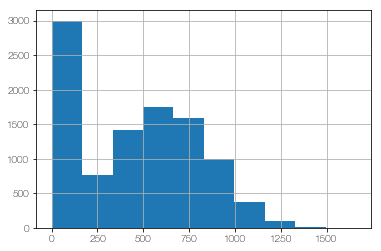

In [5]:
x = pd.Series(final_cash)
x.hist()


**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [6]:
ngames = 10000
bankrupt = 0
for g in range(ngames):
    if game()==0:
        bankrupt += 1
bankrupt/ngames

0.2618

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [19]:
def jail_game():
    visitedJail = False
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if s==30:
            visitedJail = True
        if c <= 0:
            if visitedJail:
                return 0
            else:
                return jail_game()
    if visitedJail:
        return c
    else:
        return jail_game()

In [20]:
ngames = 10000
bankrupt = 0
for g in range(ngames):
    if jail_game()==0:
        bankrupt += 1
bankrupt/ngames

0.2011

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [21]:
def is_jail_game():
    visitedJail = False
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if s==30:
            return 1
        if c <= 0:
            return 0
    return 0

In [22]:
ngames = 10000
jail = 0
for g in range(ngames):
    if is_jail_game()==1:
        jail += 1
jail/ngames

0.4614

By Bayes, 
$$P(J\mid B) = \frac{P(B|J)P(J)}{P(B)}$$
And our ingredients are:
$$P(B) = 0.2618$$
$$P(B\mid J) = 0.2011$$
$$P(J)=0.4614$$

Plugging in:
$$P(J|B)=\frac{0.2011 \times 0.4614}{0.2618}$$

$$P(J|B)=0.3544$$

### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan, Kyle, and Sofie have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [8]:
dfLog = pd.read_csv("game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
0,2,6,16,22,32,0,4,13,15,21,...,618,581,777,813,794,771,771,761,751,real
1,7,16,26,30,38,0,9,17,22,28,...,503,475,385,460,453,438,449,422,408,fake
2,6,17,19,21,28,36,1,4,12,20,...,435,425,415,405,395,385,375,365,355,real
3,5,11,21,30,36,2,10,17,21,27,...,713,681,642,692,683,666,640,605,804,fake
4,3,6,11,18,25,30,39,4,13,22,...,576,481,678,553,534,508,478,378,572,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [15]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
995,4,12,21,29,38,4,13,24,28,36,...,619,621,632,595,789,777,722,696,683,NaN
996,2,9,15,24,31,37,37,37,37,37,...,0,0,0,0,0,0,0,0,0,NaN
997,4,8,17,20,25,37,9,17,20,28,...,542,516,503,465,660,644,625,597,697,NaN
998,5,11,14,19,22,30,30,30,30,30,...,0,0,0,0,0,0,0,0,0,NaN
999,7,13,20,29,31,12,18,25,28,35,...,155,117,313,302,304,404,374,339,539,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [7]:
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
    
    dfPredict.loc[:, "Prediction"] = "real"
    
    return dfPredict 

In [20]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))

**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 